<a href="https://colab.research.google.com/github/Son-github/DC-chapter6_2/blob/main/dc_chapter6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,724 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and di

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.dpi'] = 100

In [3]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 74.1MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [4]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [5]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [6]:
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()

In [7]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [8]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

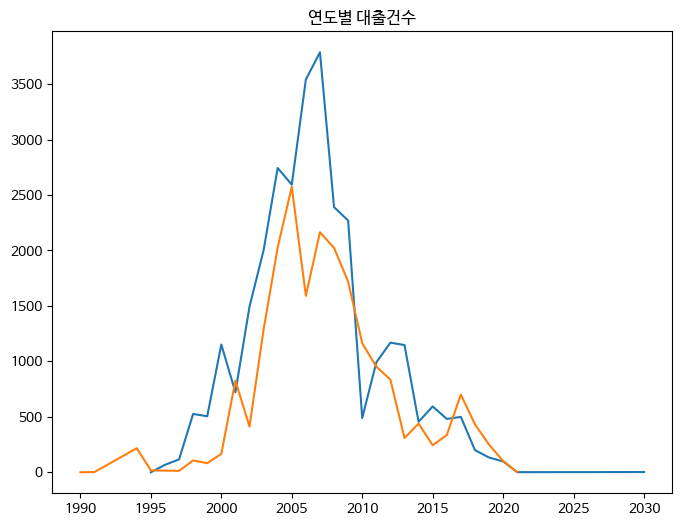

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

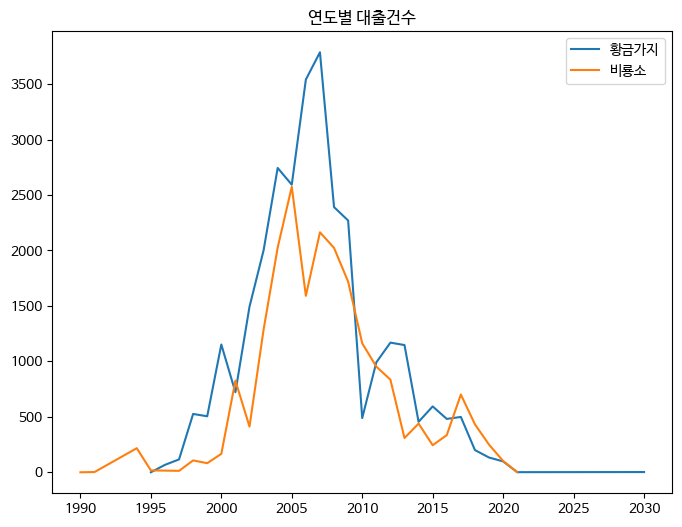

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

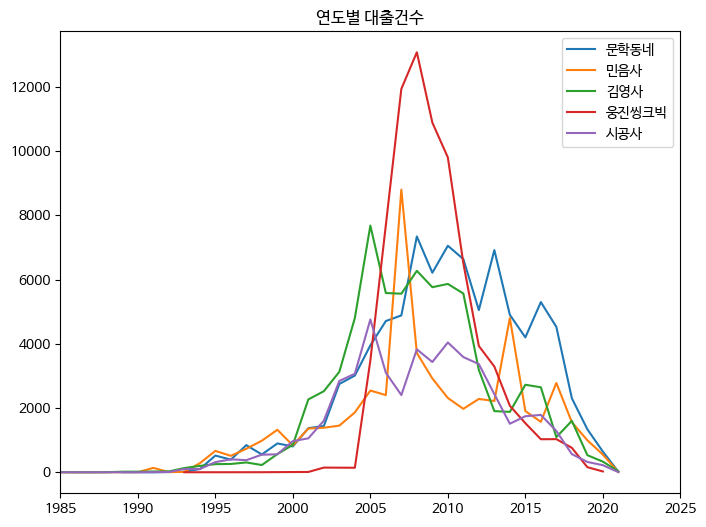

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
  line = ns_book9[ns_book9['출판사'] == pub]
  ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

In [15]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [16]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

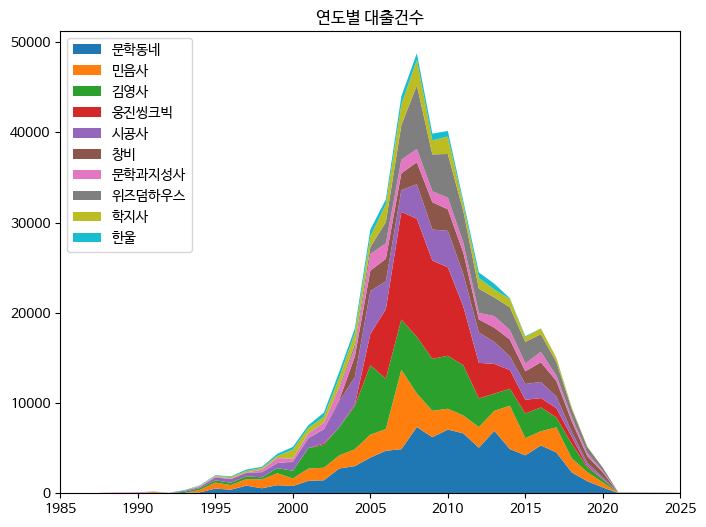

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

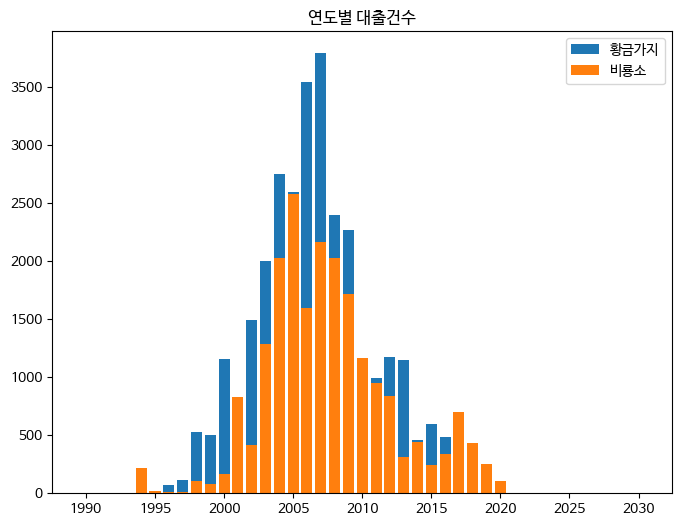

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

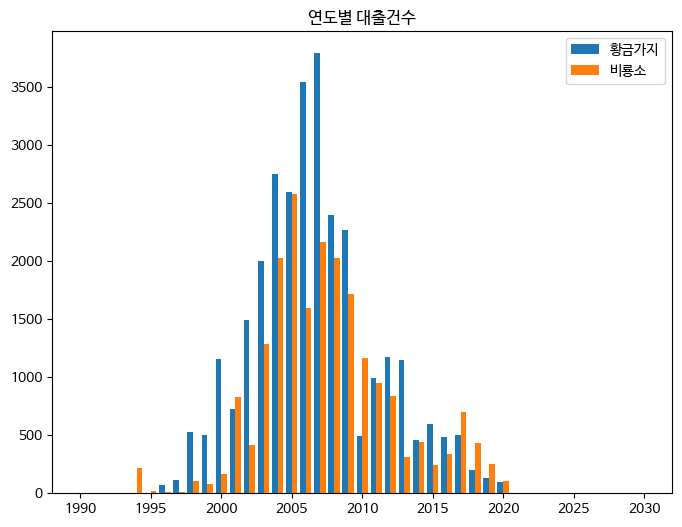

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

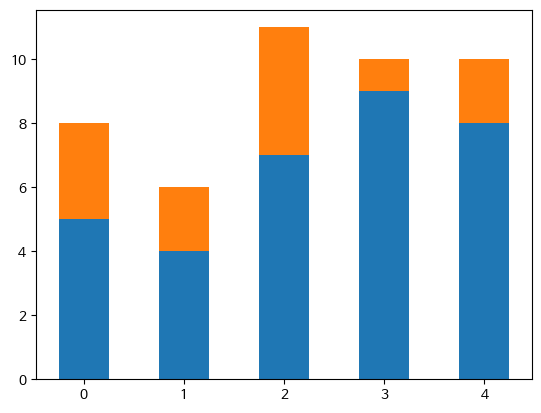

In [20]:
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

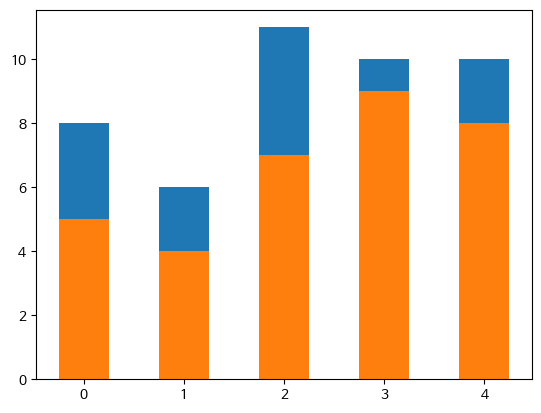

In [21]:
height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

In [22]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [23]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [24]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

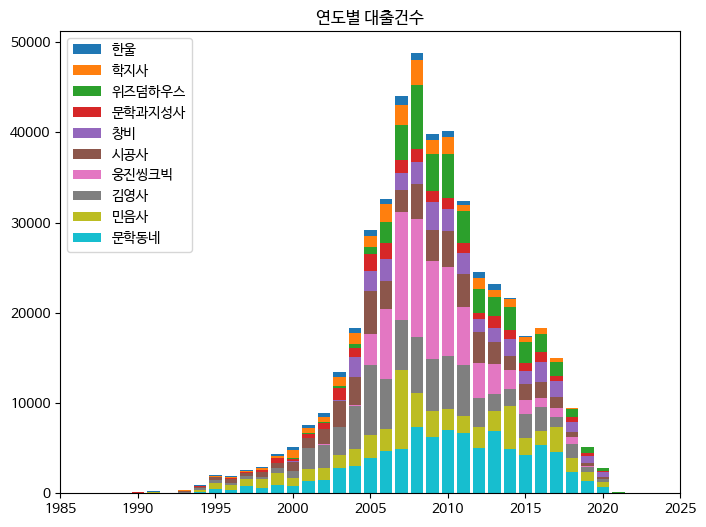

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]
  label = ns_book12.index[i]
  ax.bar(year_cols, bar, label=label)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

In [26]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

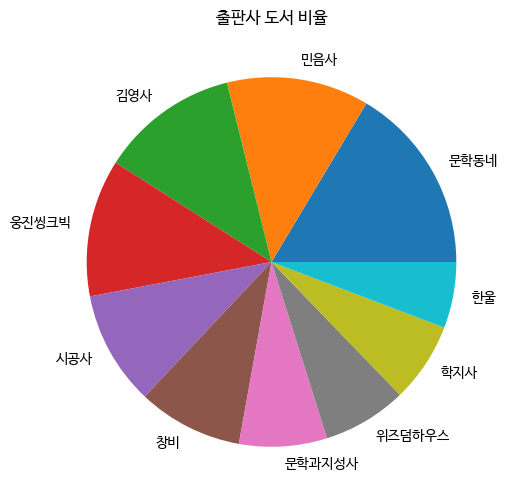

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show()

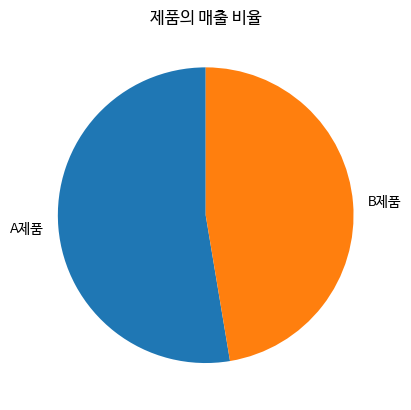

In [28]:
plt.pie([10,9], labels=['A제품', 'B제품'], startangle=90)
plt.title('제품의 매출 비율')
plt.show()

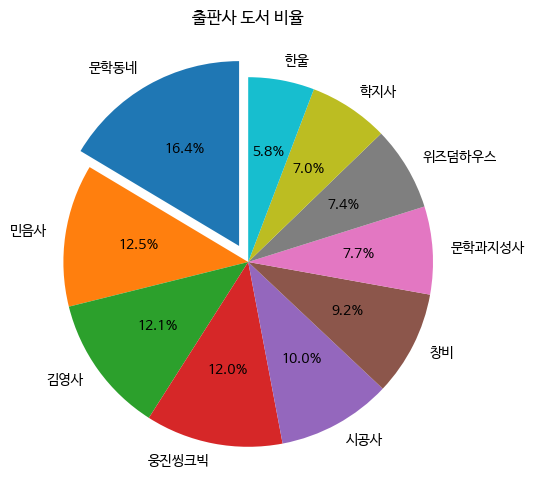

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

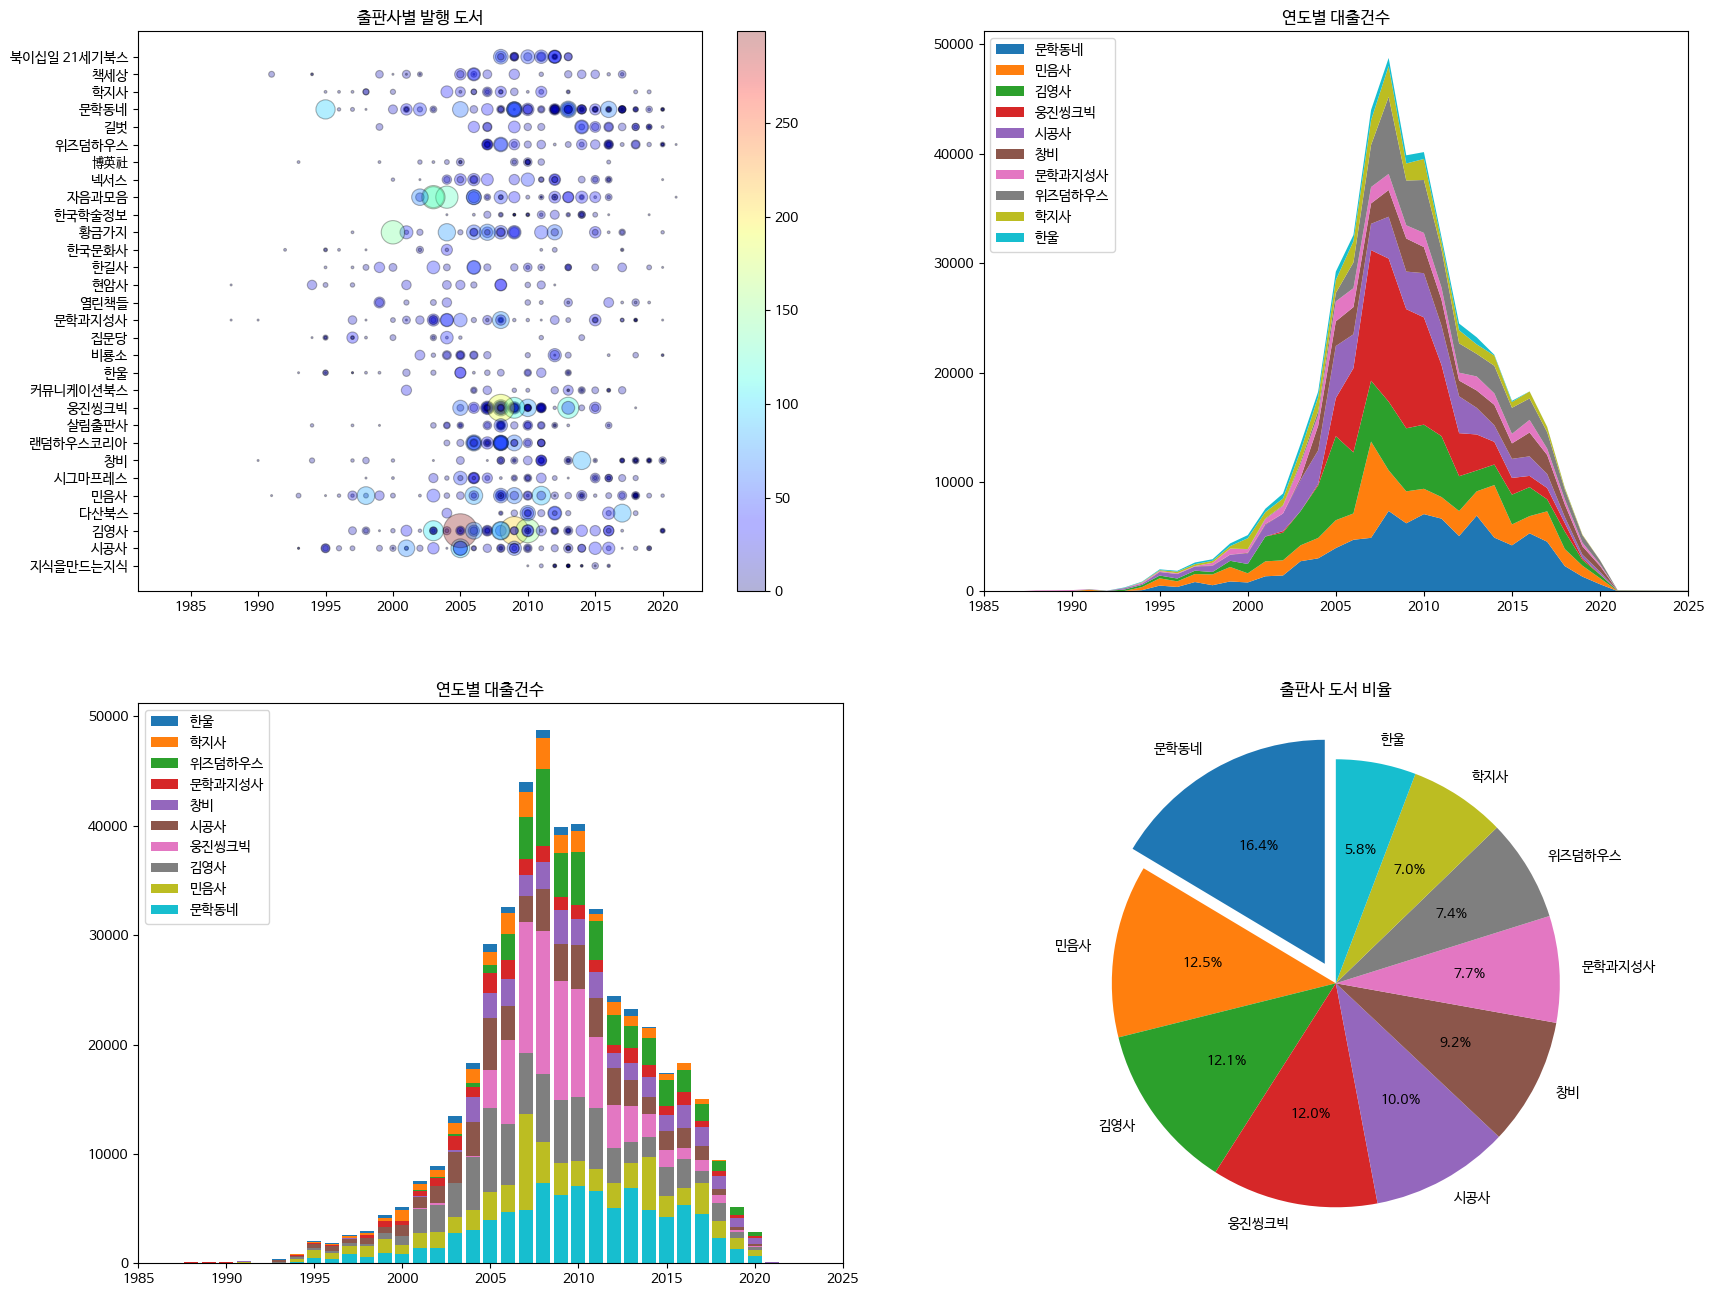

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'],
           linewidths=0.8, edgecolors='k', alpha=0.3,
           s=ns_book8['대출건수']*2, c=ns_book8['대출건수'],
           cmap='jet')
axes[0, 0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axes[0, 0])

axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[0, 1].set_title('연도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]
  label = ns_book12.index[i]
  axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('연도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

axes[1, 1].pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()